In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

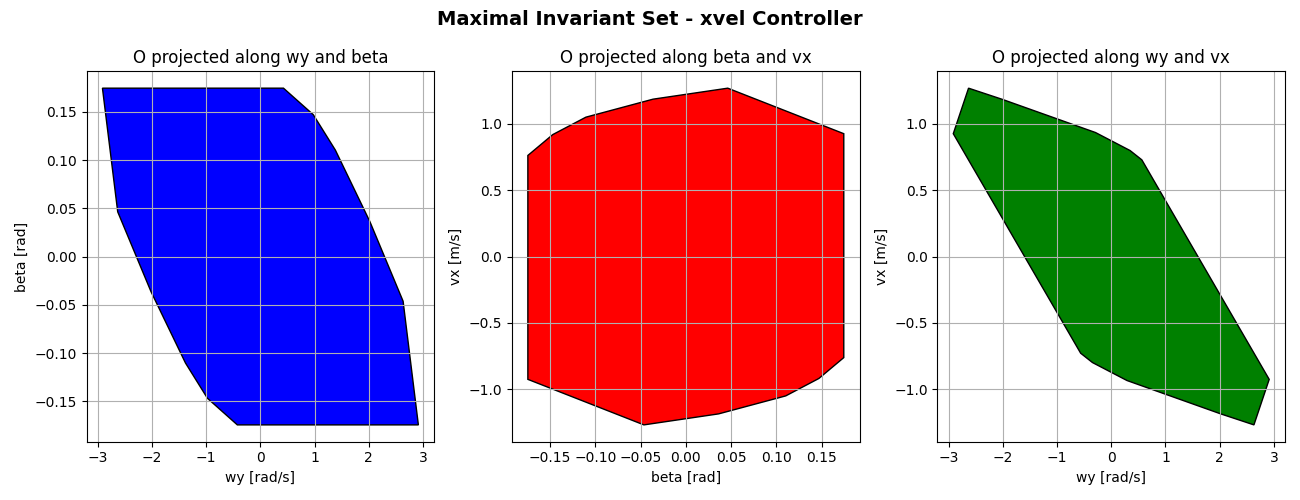

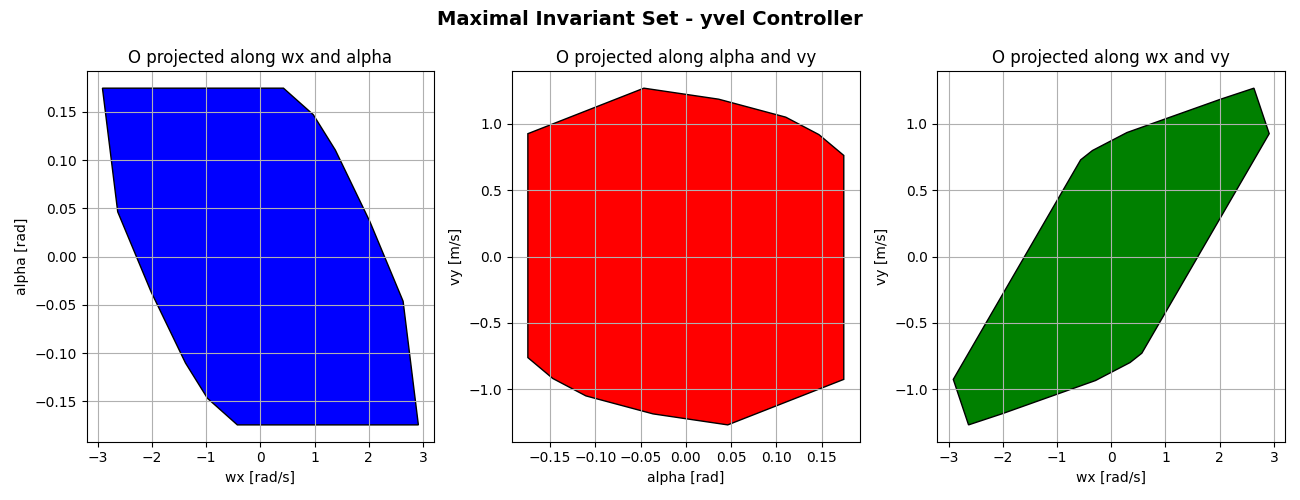

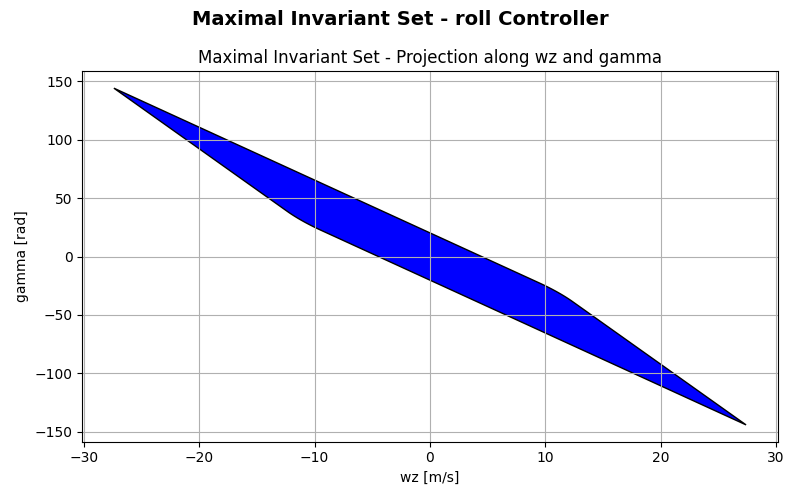

In [ ]:
Ts = 0.05
sim_time = 5
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])  # initial state
# roll to 30°
#x0 = np.array([0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0, 0, 0]) 

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

### MPC_Control_VelX 1 step OL

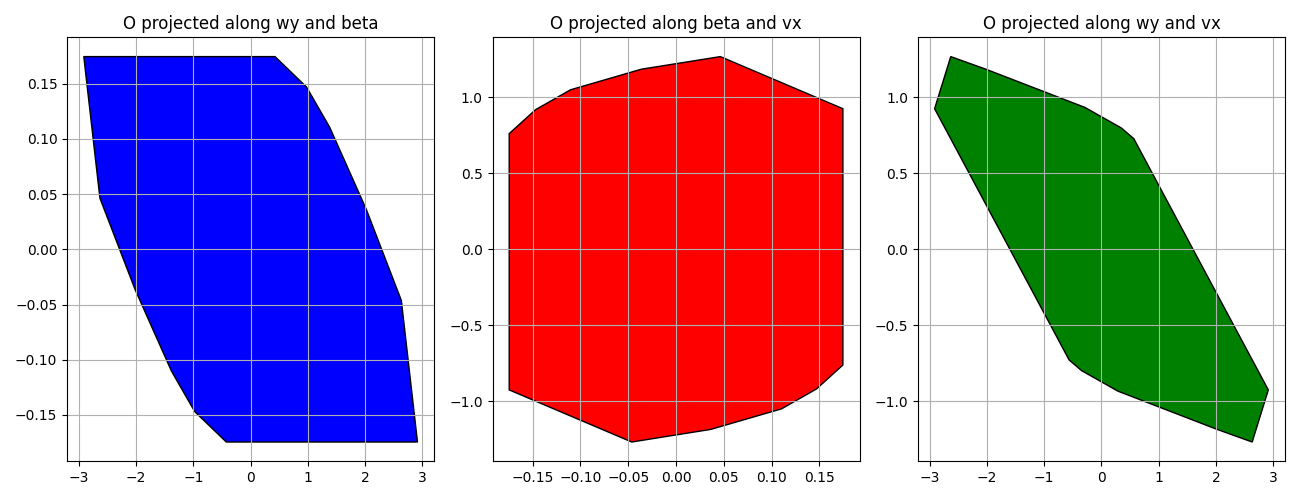

In [33]:
from LinearMPC.MPCControl_xvel import MPCControl_xvel
import cvxpy as cp
Ts = 0.05
sim_time = 7
H = 7
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_x.get_u(x0)

### MPC_Control_VelY 1 step OL

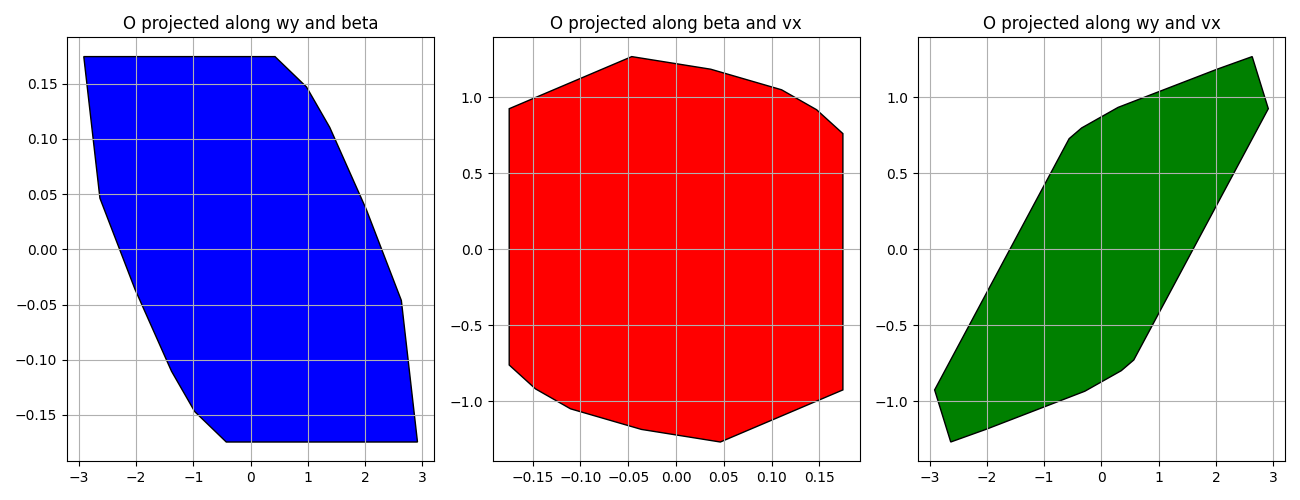

In [34]:
from LinearMPC.MPCControl_yvel import MPCControl_yvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 1])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_y.get_u(x0)

### MPC_Control_VelZ 1 step OL

In [22]:
from LinearMPC.MPCControl_zvel import MPCControl_zvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_z.get_u(x0)

### MPC_Control_ROLL 1 step OL

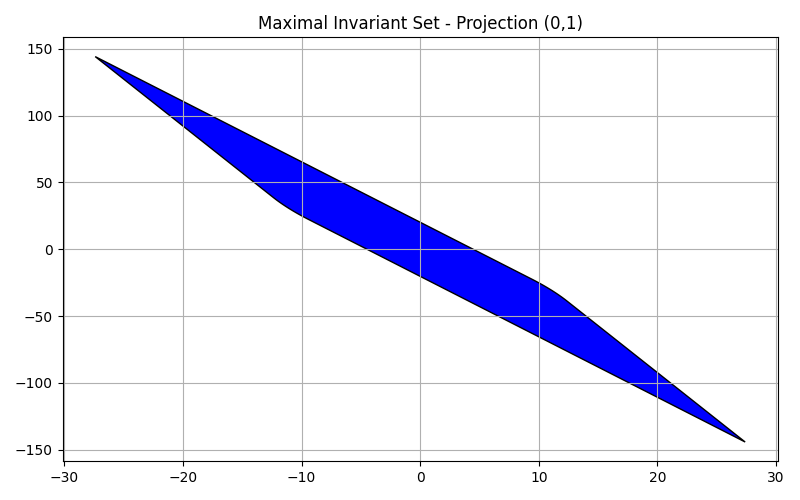

In [28]:
from LinearMPC.MPCControl_roll import MPCControl_roll
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0,0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_roll.get_u(x0)